In [17]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import FuncFormatter

In [18]:
# Loading the dataset into pandas dataframe
df = pd.read_csv("./PS_20174392719_1491204439457_log.csv")

In [19]:
# Display the first 10 rows of the dataframe
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [20]:
# Display data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [21]:
df.shape

(6362620, 11)

In [22]:
# Summary statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [23]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [24]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [25]:
# Checking for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

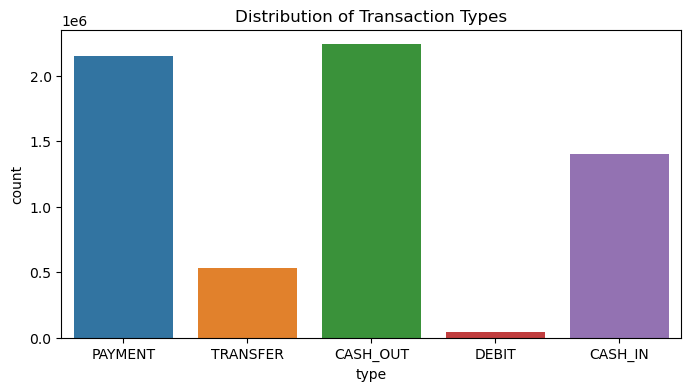

In [26]:
# Count plot for 'type' of transaction
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type')
plt.title('Distribution of Transaction Types')
plt.show()

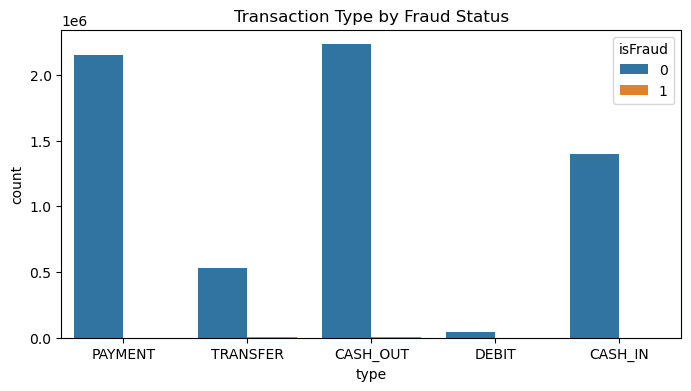

In [29]:
# Bar plot to see the relationship between 'type' and 'isFraud'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Transaction Type by Fraud Status')
plt.show()

/var/folders/zf/krw0828j5wl36_564605_0vh0000gn/T/ipykernel_20773/2379934200.py:14: RuntimeWarning: overflow encountered in exp
  formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(np.exp(y)))


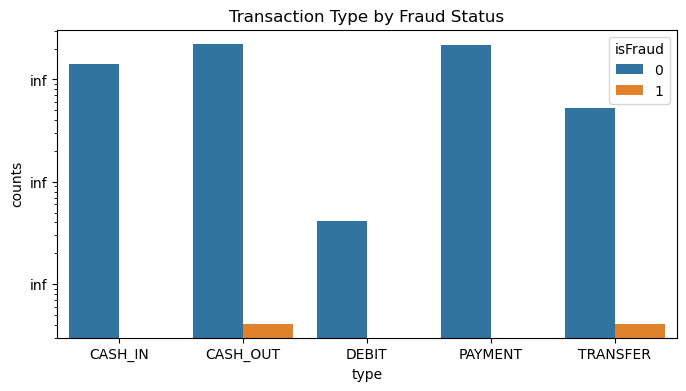

In [30]:
# Transaction Type by Fraud Status

# Calculate the counts
count_data = df.groupby(['type', 'isFraud']).size().reset_index(name='counts')
# Create the plot with seaborn's barplot
plt.figure(figsize=(8, 4))
barplot = sns.barplot(data=count_data, x='type', y='counts', hue='isFraud')
# Set the title
plt.title('Transaction Type by Fraud Status')
# Set the y-axis to a log scale
plt.yscale('log')
# Fix the labels to show the actual counts instead of log-transformed values

formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(np.exp(y)))
barplot.yaxis.set_major_formatter(formatter)

plt.show()

Label Encoding

In [31]:
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [32]:
# Checking for non-numeric entries
for col in df.columns:
    if df[col].dtype == 'object':
        # Attempt to convert to numeric, set errors='coerce' to handle exceptions
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Handling or investigating remaining missing values after coercion
print(df.isnull().sum())

step                    0
type              6362620
amount                  0
nameOrig          6362620
oldbalanceOrg           0
newbalanceOrig          0
nameDest          6362620
oldbalanceDest          0
newbalanceDest          0
isFraud                 0
isFlaggedFraud          0
dtype: int64


In [33]:
# Convert Categorical Data to Numeric using Label Encoding
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [34]:
df = pd.get_dummies(df, columns=['type'], prefix='type')

In [35]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_0
0,1,9839.64,NaN,170136.0,160296.36,NaN,0.0,0.0,0,0,True
1,1,1864.28,NaN,21249.0,19384.72,NaN,0.0,0.0,0,0,True
2,1,181.00,NaN,181.0,0.00,NaN,0.0,0.0,1,0,True
3,1,181.00,NaN,181.0,0.00,NaN,21182.0,0.0,1,0,True
4,1,11668.14,NaN,41554.0,29885.86,NaN,0.0,0.0,0,0,True


In [36]:
df.corr()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_0
step,1.000000,0.022373,NaN,-0.010058,-0.010299,NaN,0.027665,0.025888,0.031578,0.003277,NaN
amount,0.022373,1.000000,NaN,-0.002762,-0.007861,NaN,0.294137,0.459304,0.076688,0.012295,NaN
nameOrig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,-0.010058,-0.002762,NaN,1.000000,0.998803,NaN,0.066243,0.042029,0.010154,0.003835,NaN
newbalanceOrig,-0.010299,-0.007861,NaN,0.998803,1.000000,NaN,0.067812,0.041837,-0.008148,0.003776,NaN
nameDest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,0.027665,0.294137,NaN,0.066243,0.067812,NaN,1.000000,0.976569,-0.005885,-0.000513,NaN
newbalanceDest,0.025888,0.459304,NaN,0.042029,0.041837,NaN,0.976569,1.000000,0.000535,-0.000529,NaN
isFraud,0.031578,0.076688,NaN,0.010154,-0.008148,NaN,-0.005885,0.000535,1.000000,0.044109,NaN
isFlaggedFraud,0.003277,0.012295,NaN,0.003835,0.003776,NaN,-0.000513,-0.000529,0.044109,1.000000,NaN


In [37]:
correlation_matrix = df.corr()

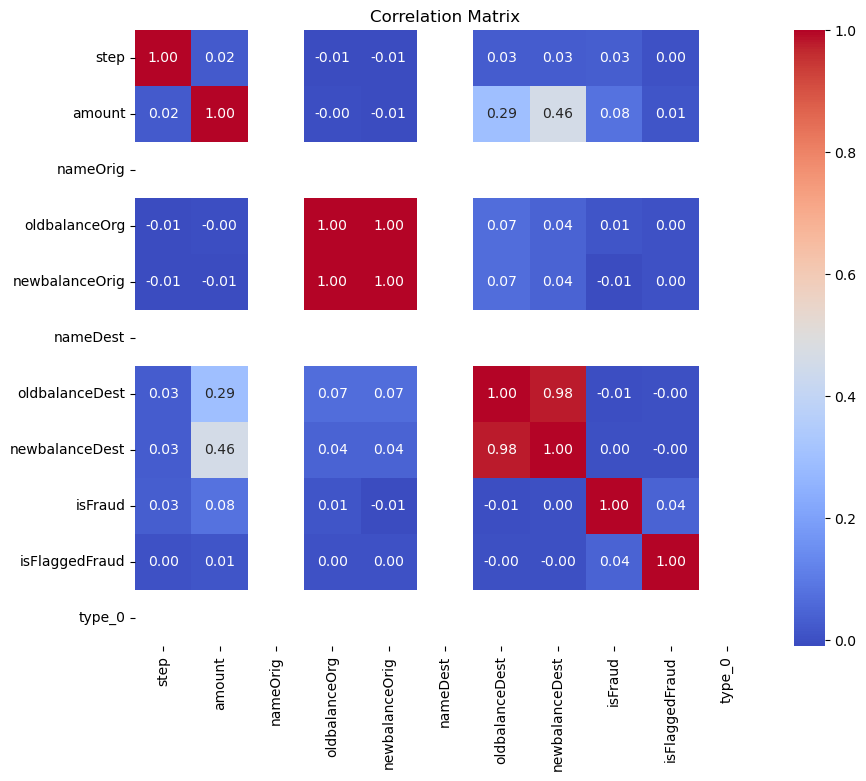

In [38]:
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as necessary
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Outliers

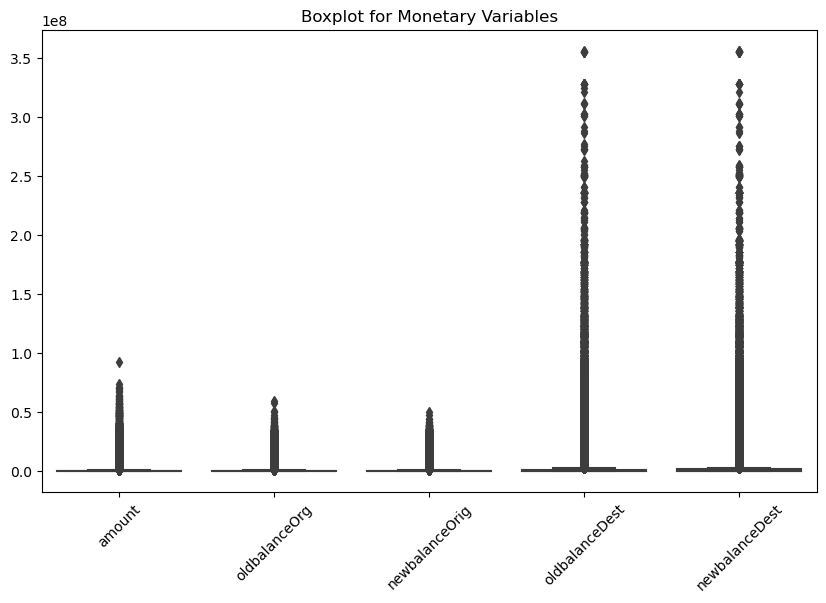

In [39]:
# Visualizing outliers with boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
plt.title('Boxplot for Monetary Variables')
plt.xticks(rotation=45)
plt.show()

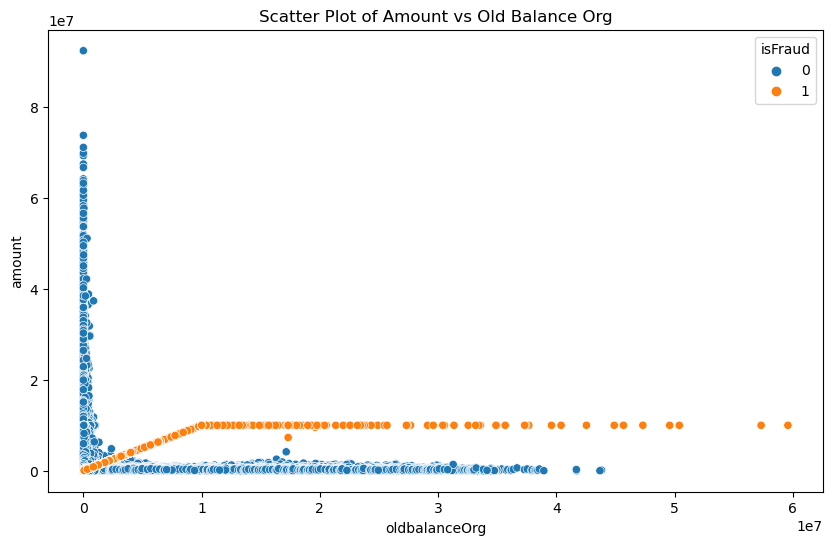

In [40]:
# Scatter plot for examining relationships and outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', hue='isFraud', data=df)
plt.title('Scatter Plot of Amount vs Old Balance Org')
plt.show()

Creating velocity features based on past transactional behavior 

In [41]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

<Axes: xlabel='step', ylabel='Count'>

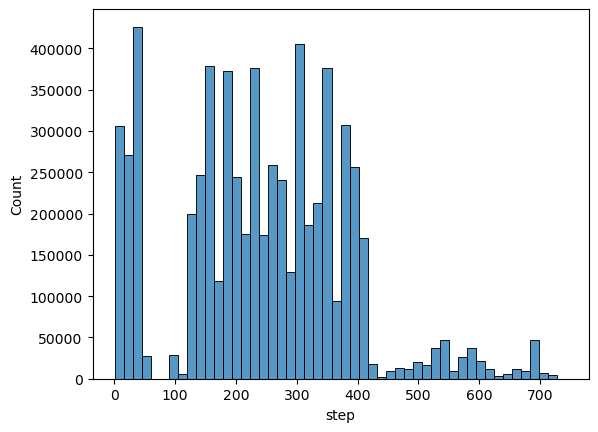

In [42]:
sns.histplot(data=df, x='step', bins=50)

In [43]:
df_100 = df.sample(n=100, random_state=42)
df_100

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_0
3737323,278,330218.42,NaN,20866.00,351084.42,NaN,452419.57,122201.15,0,0,True
264914,15,11647.08,NaN,30370.00,18722.92,NaN,0.00,0.00,0,0,True
85647,10,152264.21,NaN,106589.00,258853.21,NaN,201303.01,49038.80,0,0,True
5899326,403,1551760.63,NaN,0.00,0.00,NaN,3198359.45,4750120.08,0,0,True
2544263,206,78172.30,NaN,2921331.58,2999503.88,NaN,415821.90,337649.60,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...
5880535,403,7457.89,NaN,0.00,0.00,NaN,0.00,0.00,0,0,True
4060469,300,2262.52,NaN,49271.00,47008.48,NaN,124780.00,127042.52,0,0,True
6175471,564,67418.91,NaN,52181.00,119599.91,NaN,1659195.46,1591776.55,0,0,True
3356826,254,9414.76,NaN,5839.90,0.00,NaN,0.00,0.00,0,0,True


In [44]:

# Convert 'step' to datetime and set it as the DataFrame's index
df['date'] = pd.to_datetime(df['step'].apply(lambda x: pd.Timestamp('2020-01-01') + pd.Timedelta(hours=x)))
df.set_index('date', inplace=True)

In [45]:
df.sample(10)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_0
date,,,,,,,,,,,
2020-01-14 13:00:00,325,15106.73,NaN,366273.00,351166.27,NaN,0.00,0.00,0,0,True
2020-01-13 16:00:00,304,292589.15,NaN,0.00,0.00,NaN,435357.24,727946.39,0,0,True
2020-01-14 11:00:00,323,264989.54,NaN,2859615.64,3124605.18,NaN,7138636.70,6873647.16,0,0,True
2020-01-09 18:00:00,210,90151.66,NaN,201304.00,291455.66,NaN,210387.66,120236.00,0,0,True
2020-01-17 15:00:00,399,107962.34,NaN,244710.00,136747.66,NaN,55441.56,163403.90,0,0,True
2020-01-12 10:00:00,274,45794.18,NaN,7085738.64,7131532.82,NaN,912966.76,867172.58,0,0,True
2020-01-08 18:00:00,186,190764.40,NaN,0.00,0.00,NaN,1880620.11,2071384.51,0,0,True
2020-01-11 12:00:00,252,12737.35,NaN,0.00,0.00,NaN,0.00,0.00,0,0,True
2020-01-09 20:00:00,212,39643.10,NaN,20538.00,60181.10,NaN,0.00,0.00,0,0,True


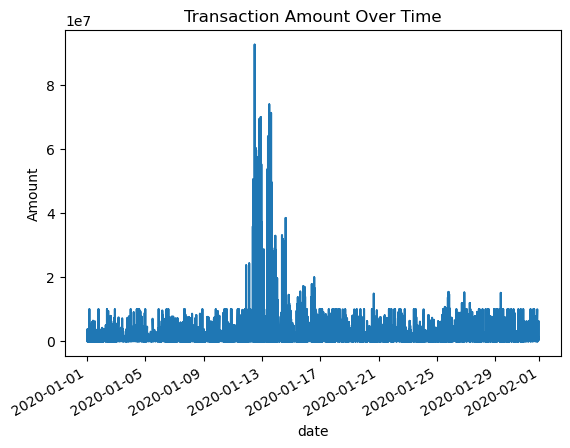

In [47]:
# Plotting some numeric column 'amount' over time
df['amount'].plot()
plt.title('Transaction Amount Over Time')
plt.ylabel('Amount')
plt.show()

In [48]:
df['date'] = pd.to_datetime(df['step'].apply(lambda x: pd.Timestamp('2020-01-01') + pd.Timedelta(hours=x)))
df.set_index('date', inplace=True)

In [49]:
# Rolling average of the transaction amounts over the past 7 days
df['rolling_avg_7d'] = df['amount'].rolling(window='7D').mean()

In [50]:
# Print the first few rows to see the new column with the 7-day rolling averages
print(df[['amount', 'rolling_avg_7d']].head(10))

                       amount  rolling_avg_7d
date                                         
2020-01-01 01:00:00   9839.64     9839.640000
2020-01-01 01:00:00   1864.28     5851.960000
2020-01-01 01:00:00    181.00     3961.640000
2020-01-01 01:00:00    181.00     3016.480000
2020-01-01 01:00:00  11668.14     4746.812000
2020-01-01 01:00:00   7817.71     5258.628333
2020-01-01 01:00:00   7107.77     5522.791429
2020-01-01 01:00:00   7861.64     5815.147500
2020-01-01 01:00:00   4024.36     5616.171111
2020-01-01 01:00:00   5337.77     5588.331000


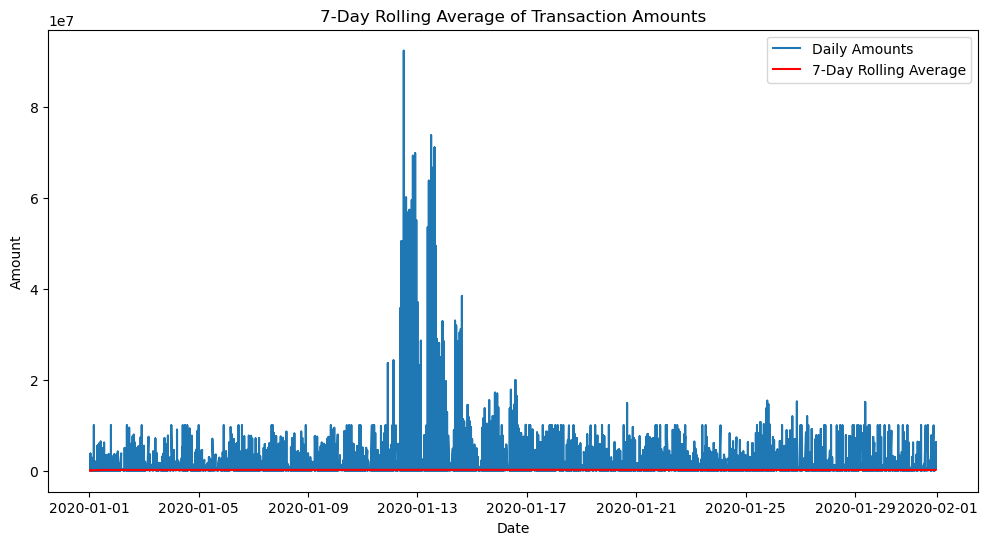

In [51]:
# Plot the original amounts and the rolling averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['amount'], label='Daily Amounts')
plt.plot(df.index, df['rolling_avg_7d'], label='7-Day Rolling Average', color='red')
plt.title('7-Day Rolling Average of Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

Rolling count of transactions in the past 7 days

In [52]:
df['rolling_tx_count_7d'] = df['amount'].rolling(window='7D').count()

In [53]:
# Print the first few rows to check the new column with the 7-day rolling transaction count
print(df[['amount', 'rolling_tx_count_7d']].head(10))

                       amount  rolling_tx_count_7d
date                                              
2020-01-01 01:00:00   9839.64                  1.0
2020-01-01 01:00:00   1864.28                  2.0
2020-01-01 01:00:00    181.00                  3.0
2020-01-01 01:00:00    181.00                  4.0
2020-01-01 01:00:00  11668.14                  5.0
2020-01-01 01:00:00   7817.71                  6.0
2020-01-01 01:00:00   7107.77                  7.0
2020-01-01 01:00:00   7861.64                  8.0
2020-01-01 01:00:00   4024.36                  9.0
2020-01-01 01:00:00   5337.77                 10.0


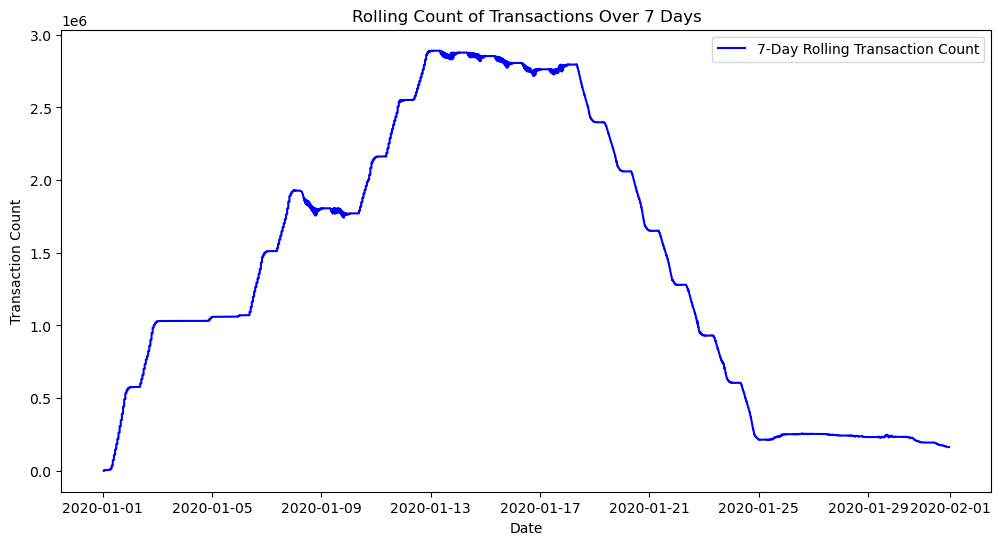

In [54]:
# Plot the rolling count of transactions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rolling_tx_count_7d'], label='7-Day Rolling Transaction Count', color='blue')
plt.title('Rolling Count of Transactions Over 7 Days')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()

Rolling sum of transaction amounts over the past 30 days

In [55]:
# Calculate the rolling sum of transaction amounts over the past 30 days
df['rolling_sum_30d'] = df['amount'].rolling(window='30D').sum()

In [57]:

# Print the first few rows to check the new column with the 30-day rolling sum of transaction amounts
print(df[['amount', 'rolling_sum_30d']].head(10))

                       amount  rolling_sum_30d
date                                          
2020-01-01 01:00:00   9839.64          9839.64
2020-01-01 01:00:00   1864.28         11703.92
2020-01-01 01:00:00    181.00         11884.92
2020-01-01 01:00:00    181.00         12065.92
2020-01-01 01:00:00  11668.14         23734.06
2020-01-01 01:00:00   7817.71         31551.77
2020-01-01 01:00:00   7107.77         38659.54
2020-01-01 01:00:00   7861.64         46521.18
2020-01-01 01:00:00   4024.36         50545.54
2020-01-01 01:00:00   5337.77         55883.31


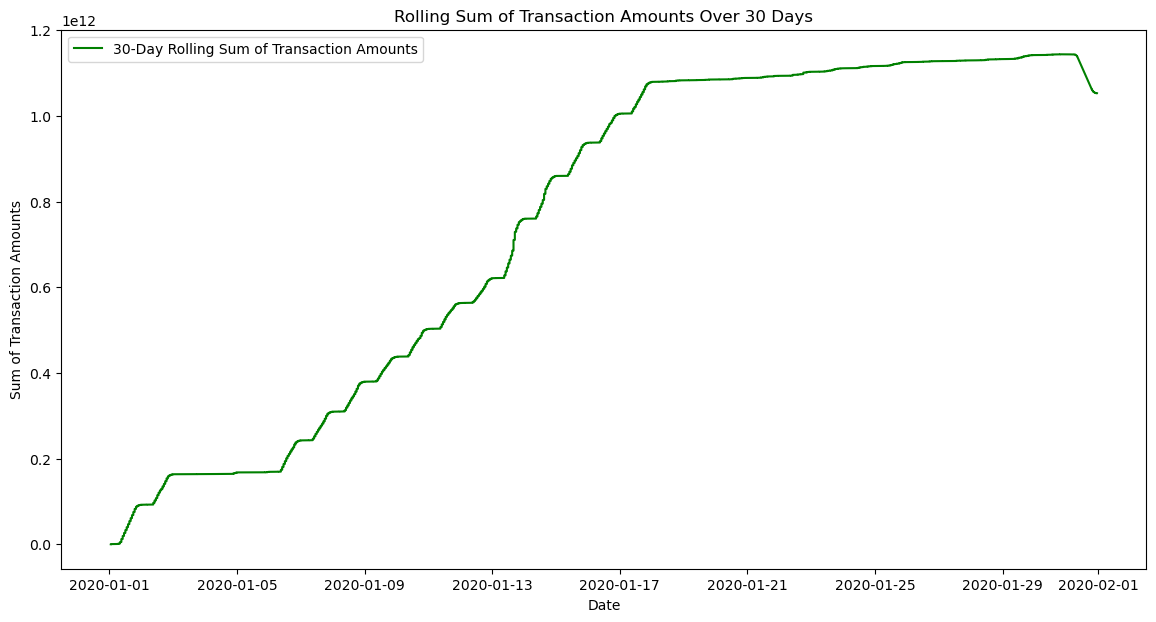

In [58]:
# Plot the rolling sum of transaction amounts
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['rolling_sum_30d'], label='30-Day Rolling Sum of Transaction Amounts', color='green')
plt.title('Rolling Sum of Transaction Amounts Over 30 Days')
plt.xlabel('Date')
plt.ylabel('Sum of Transaction Amounts')
plt.legend()
plt.show()